In [45]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import tensorflow as tf
from keras import Sequential, Input
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

In [2]:
sys.path.append(r'../utils/')

from mostrarDatos import visualizarPerfiles
from segmentarDatos import obtenerExperimento

In [3]:
data = mat73.loadmat(r'../datos/experimento3_sep.mat')

X = data["X"]
U = data["U"]
N = data["N"]

sizeExp = np.insert(data["N"],0,0).astype(int)
sizeExp = sizeExp[1:]

tm = 5e-3 # Tiempo de muestreo
Q = np.size(U,0) # Número de muestras
t = np.arange(0, Q*tm, tm) # Vector de tiempo

print(f"Dimensiones de los datos = {X.T.shape} (espacio, tiempo)")
print(f"Número de experimentos : {len(sizeExp)-1}")
print(f"Longitud de los primeros 5 experimentos : {sizeExp[:5]}")

Dimensiones de los datos = (500, 11953) (espacio, tiempo)
Número de experimentos : 35
Longitud de los primeros 5 experimentos : [318 340 340 359 341]


Uno de los principales desafíos en el control de la deposición de fluidos no newtonianos reside en la fuerte no linealidad presente en su dinámica debido a su reología. Ello provoca que, bajo ciertas condiciones, el flujo de material pueda experimentar fenómenos de _flujo inestable_, lo que resulta en distribuciones irregulares e indeseadas a lo largo de la pista de deposición, como se observa en la imagen inferior.

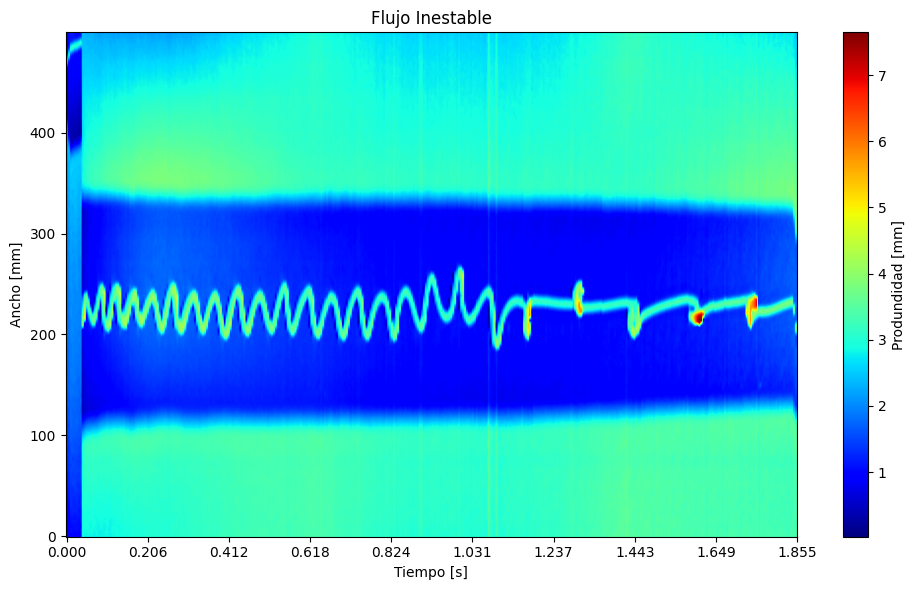

In [4]:
XX, UU = obtenerExperimento(X,U,sizeExp,15)
visualizarPerfiles(XX, title="Flujo Inestable", colormap='jet')

# En experimento 2, 30, 34 hay una burbuja de aire
# En experimento 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29 hay flujo inestable

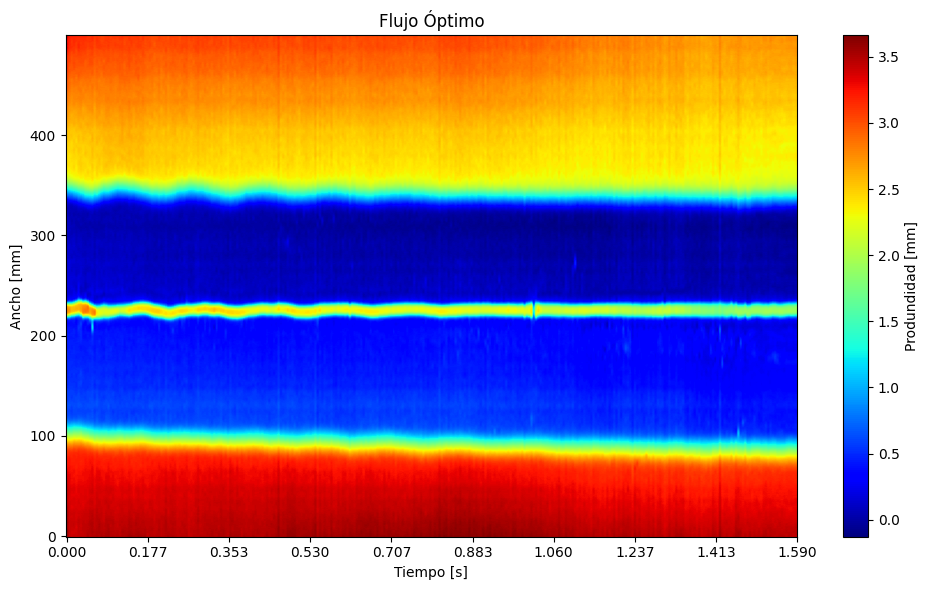

In [5]:
XX, UU = obtenerExperimento(X,U,sizeExp,0)
visualizarPerfiles(XX, title="Flujo Óptimo", colormap='jet')

Cuando se produce esta inestabilidad en el flujo de adhesivo, el sistema de control enfrenta dificultades adicionales, ya que tiende a generar predicciones erróneas al asumir que el sistema opera bajo un régimen estable. Este supuesto es esencial para un dispensado preciso y controlado del adhesivo, ya que la condición de estabilidad en el flujo es la óptima para garantizar un uso eficiente del material.

Además, pueden surgir otros fallos durante la deposición como las burbujas de aire en el circuito, o que se acabe el propio depósito de adhesivo que impedirán el correcto funcionamiento del sistema de control.

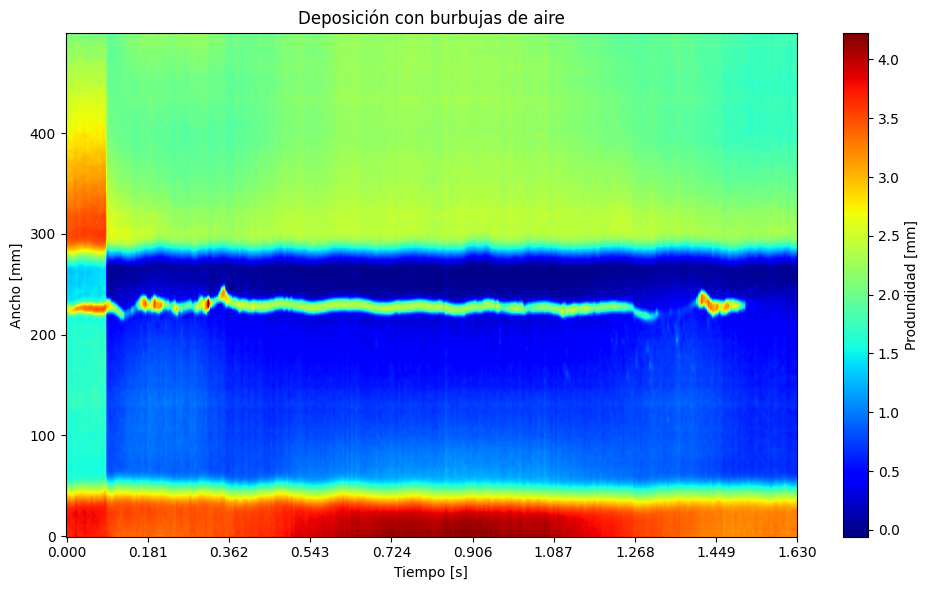

In [7]:
XX, UU = obtenerExperimento(X,U,sizeExp,34)
visualizarPerfiles(XX, title="Deposición con burbujas de aire", colormap='jet')

In [6]:
# Etiquetado de los datos
Y = np.zeros((Q,1))

# 3 clases -> 0: estable, 1: burbuja, 2: inestable

# Experimento 3
XX, UU = obtenerExperimento(X,U,sizeExp,3)
Y3 = np.zeros((np.size(UU,1),1))
Y3[210:221] = 1
Y[sum(sizeExp[:3]):sum(sizeExp[:3+1])] = Y3

# Experimento 13
XX, UU = obtenerExperimento(X,U,sizeExp,13)
Y13 = np.zeros((np.size(UU,1),1))
Y13[16:] = 2
Y[sum(sizeExp[:13]):sum(sizeExp[:13+1])] = Y13

# Experimento 14
XX, UU = obtenerExperimento(X,U,sizeExp,14)
Y14 = np.ones((np.size(UU,1),1))*2
Y[sum(sizeExp[:14]):sum(sizeExp[:14+1])] = Y14

# Experimento 15
XX, UU = obtenerExperimento(X,U,sizeExp,15)
Y15 = np.ones((np.size(UU,1),1))*2
Y[sum(sizeExp[:15]):sum(sizeExp[:15+1])] = Y15

# Experimento 16
XX, UU = obtenerExperimento(X,U,sizeExp,16)
Y16 = np.ones((np.size(UU,1),1))*2
Y[sum(sizeExp[:16]):sum(sizeExp[:16+1])] = Y16

# Experimento 17
XX, UU = obtenerExperimento(X,U,sizeExp,17)
Y17 = np.ones((np.size(UU,1),1))*2
Y[sum(sizeExp[:17]):sum(sizeExp[:17+1])] = Y17

# Experimento 19
XX, UU = obtenerExperimento(X,U,sizeExp,19)
Y19 = np.zeros((np.size(UU,1),1))
Y19[20:] = 2
Y[sum(sizeExp[:19]):sum(sizeExp[:19+1])] = Y19

# Experimento 20
XX, UU = obtenerExperimento(X,U,sizeExp,20)
Y20 = np.zeros((np.size(UU,1),1))
Y20[:304] = 2
Y[sum(sizeExp[:20]):sum(sizeExp[:20+1])] = Y20

# Experimento 21
XX, UU = obtenerExperimento(X,U,sizeExp,21)
Y21 = np.zeros((np.size(UU,1),1))
Y21[:325] = 2
Y[sum(sizeExp[:21]):sum(sizeExp[:21+1])] = Y21

# Experimento 22
XX, UU = obtenerExperimento(X,U,sizeExp,22)
Y22 = np.zeros((np.size(UU,1),1))
Y22[:94] = 2
Y[sum(sizeExp[:22]):sum(sizeExp[:22+1])] = Y22

# Experimento 23
XX, UU = obtenerExperimento(X,U,sizeExp,23)
Y23 = np.zeros((np.size(UU,1),1))
Y23[:180] = 2
Y[sum(sizeExp[:23]):sum(sizeExp[:23+1])] = Y23

# Experimento 25
XX, UU = obtenerExperimento(X,U,sizeExp,25)
Y25 = np.zeros((np.size(UU,1),1))
Y25[80:] = 2
Y[sum(sizeExp[:25]):sum(sizeExp[:25+1])] = Y25

# Experimento 26
XX, UU = obtenerExperimento(X,U,sizeExp,26)
Y26 = np.zeros((np.size(UU,1),1))
Y26[220:] = 2
Y[sum(sizeExp[:26]):sum(sizeExp[:26+1])] = Y26

# Experimento 27
XX, UU = obtenerExperimento(X,U,sizeExp,27)
Y27 = np.zeros((np.size(UU,1),1))
Y27[77:] = 2
Y[sum(sizeExp[:27]):sum(sizeExp[:27+1])] = Y27

# Experimento 28
XX, UU = obtenerExperimento(X,U,sizeExp,28)
Y28 = np.ones((np.size(UU,1),1))*2
Y[sum(sizeExp[:28]):sum(sizeExp[:28+1])] = Y28

# Experimento 29
XX, UU = obtenerExperimento(X,U,sizeExp,29)
Y29 = np.zeros((np.size(UU,1),1))
Y29[80:] = 2
Y[sum(sizeExp[:29]):sum(sizeExp[:29+1])] = Y29

# Experimento 30
XX, UU = obtenerExperimento(X,U,sizeExp,30)
Y30 = np.zeros((np.size(UU,1),1))
Y30[15:70] = 1
Y[sum(sizeExp[:30]):sum(sizeExp[:30+1])] = Y30

# Experimento 34
XX, UU = obtenerExperimento(X,U,sizeExp,34)
Y34 = np.zeros((np.size(UU,1),1))
Y34[28:72] = 1
Y34[250:] = 1
Y[sum(sizeExp[:34]):sum(sizeExp[:34+1])] = Y34

# Ruta del archivo de salida
#ruta_archivo = r"../datos/labelsExperimento3.mat"

# Guardar la matriz Y en el archivo .mat
#scipy.io.savemat(ruta_archivo, {"Y": Y})


Para esta primera aproximación, se optará por emplear la SVD como técnica de reducción de la dimensión. Este algoritmo factoriza la matriz dada en $X = U \cdot \Sigma \cdot V^T$. Donde las columnas de $U$ y $V$ conforman bases ortonormalizadas del espacio en columnas y filas de $X$, respectivamente. Es preciso anotar que al ser X una matriz espacio-temporal, las matrices U y V son bases ortonormales referidas al espacio y al tiempo en el que se han desarrollado los experimentos.

In [23]:
X = X.T
[Ur, Sr, Vr] = np.linalg.svd(X, full_matrices=False)

cdS = np.cumsum(Sr) / np.sum(Sr) # Energía acumulada

# Método intuitivo
r = 14
Vr14 = Vr[:(r+1),:] # Matriz de cambio de base a espacio de baja dimensión
Xr14 = Ur[:,:(r+1)] @ np.diag(Sr[:(r+1)]) @ Vr[:(r+1),:]

# Optimal Hard Thresholding
beta = X.shape[1] / X.shape[0]
omega = 0.56 * beta**3 - 0.95 * beta**2 + 1.82 * beta + 1.43
threshold = omega * np.median(Sr) # Umbral óptimo

roptimal = np.argmin(np.abs(Sr - threshold))
print(f"Optimal rank r truncation: {roptimal}")

XrOpt = Ur[:,:(roptimal+1)] @ np.diag(Sr[:(roptimal+1)]) @ Vr[:(roptimal+1),:]

X = X.T

Optimal rank r truncation: 184


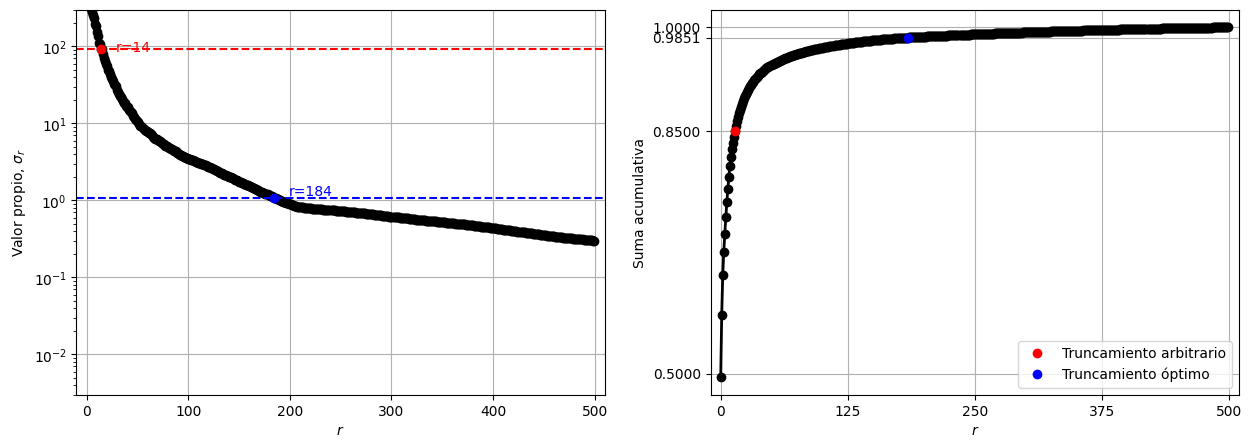

In [22]:
# Rank-r truncation
fig1,axs = plt.subplots(1,2,figsize=(15,5))

axs[0].semilogy(Sr,'-o', color='k')

axs[0].plot(r, Sr[r+1], 'ro')
axs[0].text(r+15, Sr[r]+2, f'r={r}', ha='left', va='center',color='r')
axs[0].axhline(y=Sr[r+1], color='r', linestyle='--')

axs[0].plot(roptimal, Sr[roptimal+1], 'bo')
axs[0].text(roptimal+15, Sr[roptimal]+0.2, f'r={roptimal}', ha='left', va='center',color='b')
axs[0].axhline(y=Sr[roptimal+1], color='b', linestyle ='--')

axs[0].set_xlim((-10,X.shape[0]+10))
axs[0].set_ylim((0.003,300))
axs[0].set_ylabel(r'Valor propio, $\sigma_r$')
axs[0].set_xlabel(r'$r$')

axs[0].grid()

axs[1].plot(cdS,'-o',color='k',linewidth=2)
axs[1].plot(r, cdS[r], 'ro',label='Truncamiento arbitrario')
axs[1].plot(roptimal, cdS[roptimal], 'bo',label='Truncamiento óptimo')
axs[1].set_xticks(np.array([0, 125, 250, 375, 500]))
axs[1].set_yticks(np.array([0.5, cdS[r], cdS[roptimal], 1]))
axs[1].set_xlim((-10,X.shape[0]+10))
axs[1].set_ylabel(r'Suma acumulativa')
axs[1].set_xlabel(r'$r$')
axs[1].legend()

axs[1].grid()

plt.show()

In [26]:
alpha = Vr14 @ X
print(f"Dimensiones de alpha = {alpha.shape} (r, tiempo)")

Dimensiones de alpha = (15, 11953) (r, tiempo)


Tras reducir la dimensión de los datos, se procederá a dividirlos en los subconjuntos de entrenamiento, validación y test correspondientes.

In [31]:
# Se usa el 60% del conjunto de datos como el conjunto de entrenamiento. Y se pondrá el 40% restante en las variables
# temporales x_ y y_.
Xtrain, x_, yTrain, y_ = train_test_split(alpha.T, Y, test_size = 0.4, random_state=1)

# El 40% restante se subdivide en partes iguales para el conjunto de validación cruzada y el de prueba
Xcv, Xtest, yCV, yTest = train_test_split(x_, y_, test_size=0.5, random_state=1)

# Se eliminan las variables temporales
del x_, y_

numAtributos = Xtrain.shape[1]
numClases = 3

print('Las dimensiones del subconjunto de entrenamiento (Atributos) son: ' + str(Xtrain.shape))
print('Las dimensiones del subconjunto de entrenamiento (Etiquetas) son: ' + str(yTrain.shape) + '\n')

print('Las dimensiones del subconjunto de validación cruzada (Atributos) son: ' + str(Xcv.shape))
print('Las dimensiones del subconjunto de validación cruzada (Etiquetas) son: ' + str(yCV.shape) + '\n')

print('Las dimensiones del subconjunto de prueba (Atributos) son: ' + str(Xtest.shape))
print('Las dimensiones del subconjunto de prueba (Etiquetas) son: ' + str(yTest.shape))

Las dimensiones del subconjunto de entrenamiento (Atributos) son: (7171, 15)
Las dimensiones del subconjunto de entrenamiento (Etiquetas) son: (7171, 1)

Las dimensiones del subconjunto de validación cruzada (Atributos) son: (2391, 15)
Las dimensiones del subconjunto de validación cruzada (Etiquetas) son: (2391, 1)

Las dimensiones del subconjunto de prueba (Atributos) son: (2391, 15)
Las dimensiones del subconjunto de prueba (Etiquetas) son: (2391, 1)


In [57]:
modelos = [
    # 1. MLP (Multilayer Perceptron)
    Sequential([
        Input(shape=(numAtributos,)),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(numClases, activation='softmax')
    ],name = 'MLP'),
    # 2. BMLP (Batched Multilayer Perceptron)
    Sequential([
        Input(shape=(numAtributos,)),
        Dense(16, activation='relu', input_shape=(numAtributos,)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(8, activation='relu'),
        Dense(numClases, activation='softmax')
    ],name = 'BMLP'),
    # 3. FCC (Fully Connected Cascade)
    Sequential([
        Input(shape=(numAtributos,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(numClases, activation='softmax')
    ],name = 'FCC')
]

/opt/anaconda3/envs/SIARM/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
for model in modelos:
    model.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 16)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 419 (1.64 KB)

 Trainable params: 419 (1.64 KB)

 Non-trainable params: 0 (0.00 B)

Model: "BMLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 16)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 483 (1.89 KB)

 Trainable params: 451 (1.76 KB)

 Non-trainable params: 32 (128.00 B)

Model: "FCC"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,203 (4.70 KB)

 Trainable params: 1,203 (4.70 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
print(Xtrain.shape)

(7171, 15)


In [65]:
alphas = [0.01, 0.01, 0.01]
historial = []
nnTrainError = []
nnCVError = []
nnF1Score = []
k = 0

for model in modelos:
    # Selección de función de coste y optimizador
    model.compile(
        loss=CategoricalCrossentropy(from_logits=False),
        optimizer=Adam(learning_rate=alphas[k]),
        metrics=['accuracy']
    )

    # Entrenamiento de modelo
    print(f"Iniciando entrenamiento de {model.name}...")

    historial.append(model.fit(
        Xtrain, tf.keras.utils.to_categorical(yTrain, num_classes=numClases),
        epochs=50,
        verbose=0
        )
    )

    print("Listo!")

    # Se almacena la fracción de predicciones incorrectas sobre el conjunto de entrenamiento
    yhat = model.predict(Xtrain, verbose=0)
    yhat = np.argmax(yhat, axis=1)
    trainError = np.mean(yhat != yTrain)
    nnTrainError.append(trainError)

    # Se almacena la fracción de predicciones incorrectas sobre el conjunto de validación cruzada
    yhat = model.predict(Xcv, verbose=0)
    yhat = np.argmax(yhat, axis=1)
    cvError = np.mean(yhat != yCV)
    nnCVError.append(cvError)

    # Se calcula el F1 score sobre el conjunto de validación cruzada
    f1 = f1_score(yCV, yhat, average='weighted')
    nnF1Score.append(f1)

    k += 1

Iniciando entrenamiento de MLP...
Listo!
Iniciando entrenamiento de BMLP...
Listo!
Iniciando entrenamiento de FCC...
Listo!


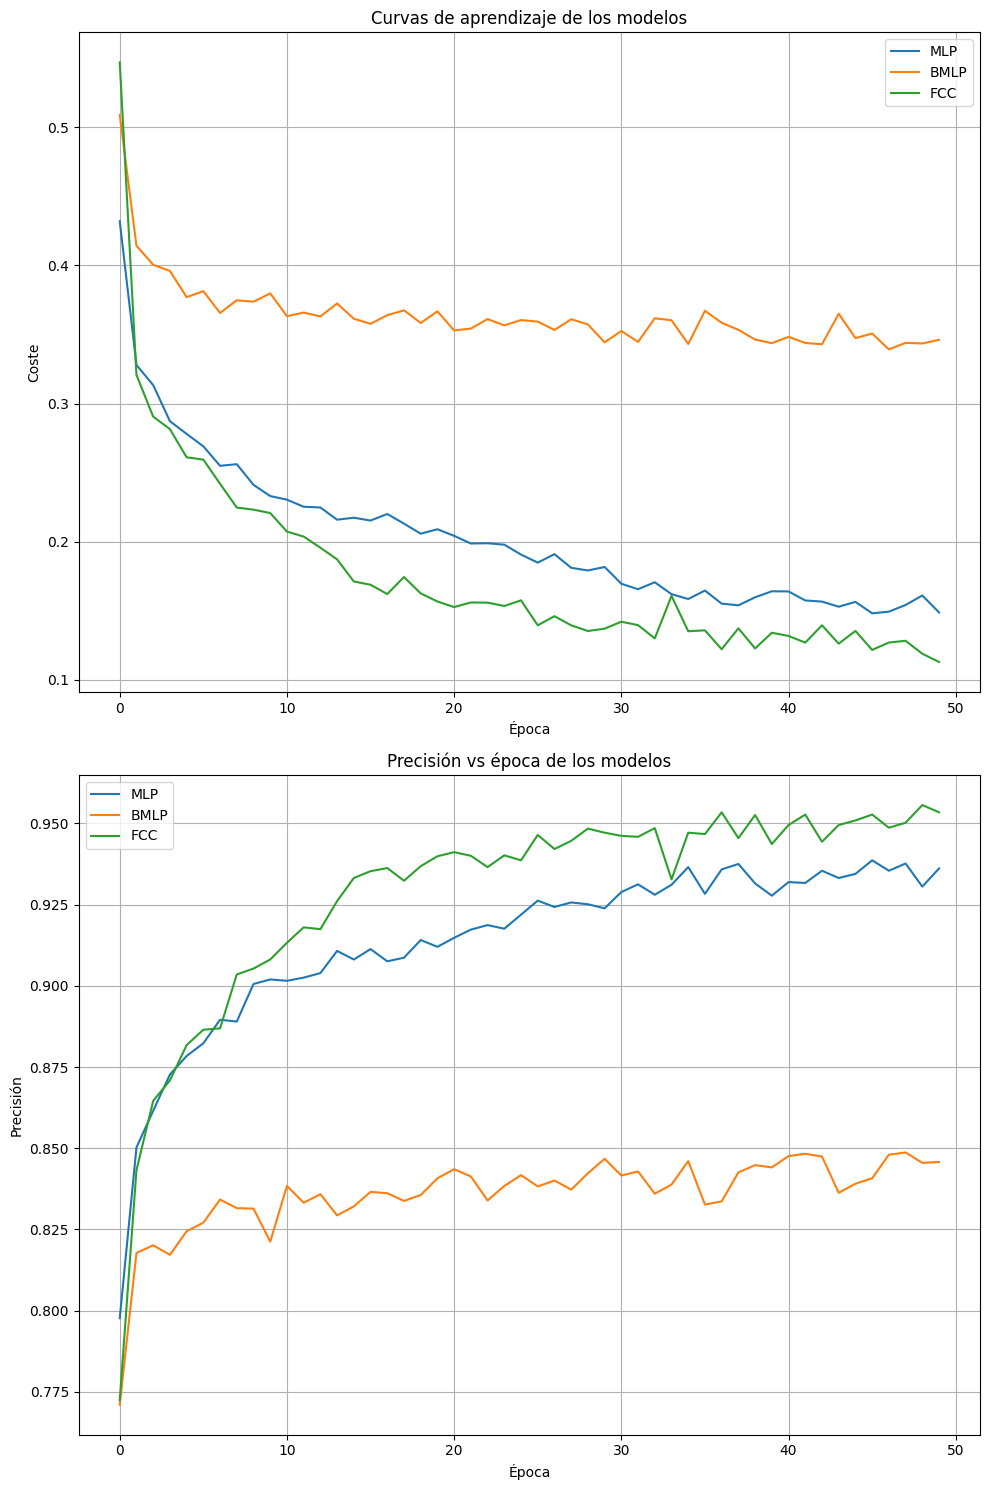

In [66]:
plt.figure(figsize=(10, 15))

# Curva de aprendizaje
plt.subplot(2, 1, 1)
for k in range(3):
    plt.plot(historial[k].history['loss'], label=modelos[k].name)
plt.title('Curvas de aprendizaje de los modelos')
plt.xlabel('Época')
plt.ylabel('Coste')
plt.legend()
plt.grid(True)

# Precisión vs época
plt.subplot(2, 1, 2)
for k in range(3):
    plt.plot(historial[k].history['accuracy'], label=modelos[k].name)
plt.title('Precisión vs época de los modelos')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [72]:
for model_num in range(len(nnTrainError)):
    print(
        f"Modelo {model_num+1}:" + "Accuracy: {0:.8f}".format(1 - nnCVError[model_num]),
        f"F1 Score: {nnF1Score[model_num]:.8f}"
        )

# Se selecciona el modelo con menor diferencia entre error de validación cruzada y de entrenamiento
#selectedModel = np.argmin(np.array(nnCVError))
#print("\n" + f"Modelo seleccionado : {selectedModel+1}")

Modelo 1:Accuracy: 0.51991059 F1 Score: 0.92954008
Modelo 2:Accuracy: 0.52835226 F1 Score: 0.87261806
Modelo 3:Accuracy: 0.52238222 F1 Score: 0.94827561


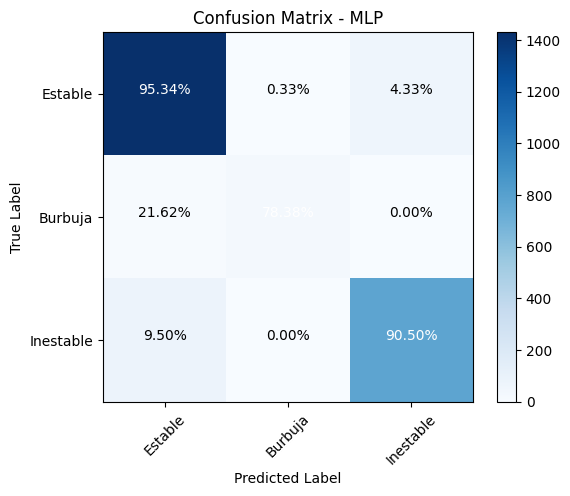

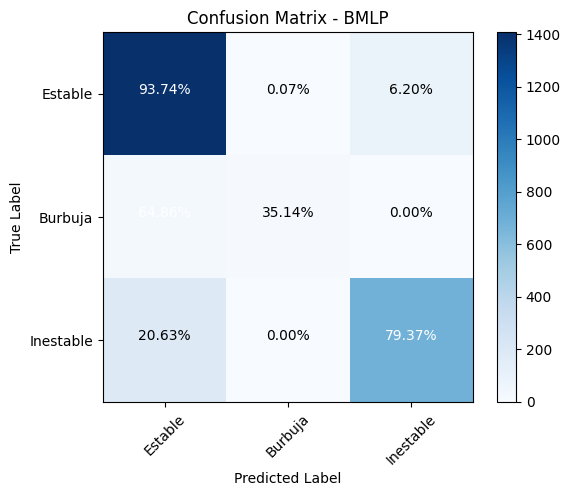

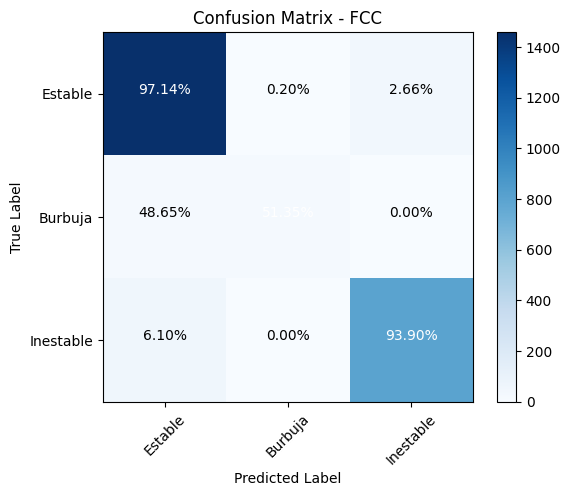

In [81]:
class_names = ['Estable', 'Burbuja', 'Inestable']

for i in range(len(modelos)):
    yhat = modelos[i].predict(Xtest, verbose=0)
    yhat = np.argmax(yhat, axis=1)
    cm = confusion_matrix(yTest.flatten(), yhat)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {modelos[i].name}')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Mostrar porcentajes en cada región
    total_samples = cm.sum(axis=1)[:, np.newaxis]
    cm_normalized = cm.astype('float') / total_samples
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm_normalized[i, j], '.2%'),
                     horizontalalignment="center",
                     color="white" if cm_normalized[i, j] > 0.5 else "black")

    plt.show()
